In [17]:
# This code runs a supervised machine learning model to classify and predict sofware bug in the provided dataset
# The current configuration sets current test size to 20% of the total dataset.

In [25]:
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 35.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 14.7 MB/s eta 0:00:00


In [26]:
# import all modules necessary
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, matthews_corrcoef, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Leave this as as. 
# Read the dataset from CSV
data = pd.read_csv('Synapse.csv')
# Drop the column named File becuase it is relevant. 
data = data.drop(['File'], axis=1)


In [ ]:
# You may here split the data and include certain features. If nothin is left here, all features will be included in the model

In [ ]:
#Static Only Features
static_features = ['WMC', 'DIT', 'NOC', 'CBO', 'RFC', 'LCOM', 'CA', 'CE', 'NPM', 'LCOM3', 'LOC', 'DAM', 'MOA', 'MFA', 'CAM', 'IC', 'CBM', 'AMC', 'CC', 'MaX_CC', 'BUG']

data_static = data[static_features]

In [ ]:
#Change Only Features
change_features = ['SUM_LOC+','BUG', 'MAX_LOC+', 'SUM_LOC-', 'MAX_LOC-', 'MAX_SET', 'AVG_SET', 'NO_REV', 'SUM_CHRN', 'MAX_CHRN', 'Age', 'CountOfDeveloper', 'REF']

data_change = data[change_features]

In [ ]:
#My Chosen Features
my_features = ['WMC','CBO', 'LCOM', 'MaX_CC' ,'REF', 'CountOfDeveloper', 'Age', 'AVG_SET', 'BUG' ]

my_data = data[my_features]

In [ ]:
# Leave this as as. 
# Function to plot the confusion matrix
def plot_confusion_matrix(cm, classifier_name):
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(f'Confusion Matrix for {classifier_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


In [ ]:
# Leave this as as. 
# Function to plot the correlation matrix
def plot_correlation_matrix(data):
    correlation_matrix = data.corr()
    sns.heatmap(correlation_matrix, annot=True)
    plt.title('Feature Correlation Matrix')
    plt.show()


In [ ]:
# Leave this as as. 
# Function to plot the correlation between features and the response variable
def plot_feature_response_correlation(data, response):
    correlation_matrix = data.corr()[response].sort_values(ascending=False)
    # Drop the response variable to avoid a self-correlation of 1
    correlation_matrix = correlation_matrix.drop(response, axis=0)
    
    sns.barplot(x=correlation_matrix.index, y=correlation_matrix.values)
    plt.title(f'Correlation with {response} Variable')
    plt.xlabel('Feature')
    plt.ylabel('Correlation coefficient')
    plt.xticks(rotation=90)  # Rotate the feature names for better readability
    plt.show()

In [ ]:
# Leave this as as. 
# Define the feature set and the target variable
X = data.drop(['BUG'], axis=1) # X is alway everyting except for the last column we are trying to predict/ classify
y = data['BUG']                # y is alwasy the response variable
 

In [ ]:
# Split the dataset into training and test sets. 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Leave this as as. 
# Plot the correlation matrix for the features in the dataset
plt.figure(figsize=(20, 20))
plot_correlation_matrix(X)

In [ ]:
# Leave this as as. 
# Add the target variable back for correlation calculation
data_for_correlation = X.copy()
data_for_correlation['BUG'] = y

# Plot the correlation matrix for features and the BUG variable
plot_feature_response_correlation(data_for_correlation, 'BUG')


In [ ]:
# Leave this as as. 

# Assuming 'data' is your DataFrame and it includes the 'BUG' column

# Calculate the correlation matrix including all features and the response variable 'BUG'
correlation_matrix = data.corr()

# Plot the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix with BUG included')
plt.show()


In [ ]:

# Define the classifiers
# Here is a list of five classifiers that you may choose in your homweork. 
# To choose a classifier (or more), uncomment the classifiler name
classifiers = {
    #'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000),
    #'SVC': SVC(probability=True, random_state=42),
    #'KNeighbors': KNeighborsClassifier(),
    #'DecisionTree': DecisionTreeClassifier(random_state=42)
}



In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import matthews_corrcoef, accuracy_score

# Leave this as is.
# Iterate through the classifiers and evaluate each one
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    
    # Print classifier name and confusion matrix
    print(f"\nClassifier: {name}")
    print(f"Confusion Matrix:\n{cm}")

    # Optionally, you can uncomment the next line if you have the plot_confusion_matrix function defined
    plot_confusion_matrix(cm, name)



In [27]:
#1 Report all results of all models in the empty cells in Table 2

#LOGISTIC REGRESSION - STATIC ONLY RESULTS
X_static = data_static.drop(['BUG'], axis=1) 
y_static = data_static['BUG']

X_train, X_test, y_train, y_test = train_test_split(X_static, y_static, test_size=0.2, random_state=42)

classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
# Calculate metrics
true_positives = conf_matrix[1, 1]
true_negatives = conf_matrix[0, 0]
false_positives = conf_matrix[0, 1]
false_negatives = conf_matrix[1, 0]

accuracy = (true_positives + true_negatives) / np.sum(conf_matrix)
precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
fpr = false_positives / (false_positives + true_negatives)

mcc_numerator = (true_positives * true_negatives) - (false_positives * false_negatives)
mcc_denominator = np.sqrt((true_positives + false_positives) * (true_positives + false_negatives) * (true_negatives + false_positives) * (true_negatives + false_negatives))
mcc = mcc_numerator / mcc_denominator

# Print the results
print(f"Accuracy (Logistic Regression - Static Only): {accuracy * 100: 2f}%")
print(f"Precision (Logistic Regression - Static Only): {precision * 100: 2f}%")
print(f"Recall (Logistic Regression - Static Only): {recall * 100: 2f}%")
print(f"FPR (Logistic Regression - Static Only): {fpr * 100: 2f}%")
print(f"MCC (Logistic Regression - Static Only): {mcc * 100: 2f}%")

#LOGISTIC REGRESSION - CHANGE ONLY RESULTS

X_change = data_change.drop(['BUG'], axis=1) 
y_change = data_change['BUG']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_change, y_change, test_size=0.2, random_state=42)

classifier1 = LogisticRegression(max_iter=1000)
classifier1.fit(X_train1, y_train1)
y_pred1 = classifier1.predict(X_test1)
conf_matrix1 = confusion_matrix(y_test1, y_pred1)
# Calculate metrics
true_positives1 = conf_matrix1[1, 1]
true_negatives1 = conf_matrix1[0, 0]
false_positives1 = conf_matrix1[0, 1]
false_negatives1 = conf_matrix1[1, 0]

accuracy1 = (true_positives1 + true_negatives1) / np.sum(conf_matrix1)
precision1 = true_positives1 / (true_positives1 + false_positives1)
recall1 = true_positives1 / (true_positives1 + false_negatives1)
fpr1 = false_positives1 / (false_positives1 + true_negatives1)

mcc_numerator1 = (true_positives1 * true_negatives1) - (false_positives1 * false_negatives1)
mcc_denominator1 = np.sqrt((true_positives1 + false_positives1) * (true_positives1 + false_negatives1) * (true_negatives1 + false_positives1) * (true_negatives1 + false_negatives1))
mcc1 = mcc_numerator1 / mcc_denominator1

# Print the results
print(f" ")
print(f"Accuracy (Logistic Regression - Change Only): {accuracy1 * 100: 2f}%")
print(f"Precision (Logistic Regression - Change Only): {precision1 * 100: 2f}%")
print(f"Recall (Logistic Regression - Change Only): {recall1 * 100: 2f}%")
print(f"FPR (Logistic Regression - Change Only): {fpr1 * 100: 2f}%")
print(f"MCC (Logistic Regression - Change Only): {mcc1 * 100: 2f}%")

#LOGISTIC REGRESSION - MY FEATURES ONLY RESULTS

X_my = my_data.drop(['BUG'], axis=1) 
y_my = my_data['BUG']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_my, y_my, test_size=0.2, random_state=42)

classifier2 = LogisticRegression(max_iter=1000)
classifier2.fit(X_train2, y_train2)
y_pred2 = classifier2.predict(X_test2)
conf_matrix2 = confusion_matrix(y_test2, y_pred2)
# Calculate metrics
true_positives2 = conf_matrix2[1, 1]
true_negatives2 = conf_matrix2[0, 0]
false_positives2 = conf_matrix2[0, 1]
false_negatives2 = conf_matrix2[1, 0]

accuracy2 = (true_positives2 + true_negatives2) / np.sum(conf_matrix2)
precision2 = true_positives2 / (true_positives2 + false_positives2)
recall2 = true_positives2 / (true_positives2 + false_negatives2)
fpr2 = false_positives2 / (false_positives2 + true_negatives2)

mcc_numerator2 = (true_positives2 * true_negatives2) - (false_positives2 * false_negatives2)
mcc_denominator2 = np.sqrt((true_positives2 + false_positives2) * (true_positives2 + false_negatives2) * (true_negatives2 + false_positives2) * (true_negatives2 + false_negatives2))
mcc2 = mcc_numerator2 / mcc_denominator2

# Print the results
print(f" ")
print(f"Accuracy (Logistic Regression - My Features Only): {accuracy2 * 100: 2f}%")
print(f"Precision (Logistic Regression - My Features Only): {precision2 * 100: 2f}%")
print(f"Recall (Logistic Regression - My Features Only): {recall2 * 100: 2f}%")
print(f"FPR (Logistic Regression - My Features Only): {fpr2 * 100: 2f}%")
print(f"MCC (Logistic Regression - My Features Only): {mcc2 * 100: 2f}%")

Accuracy (Logistic Regression - Static Only):  78.620690%
Precision (Logistic Regression - Static Only):  62.500000%
Recall (Logistic Regression - Static Only):  28.571429%
FPR (Logistic Regression - Static Only):  5.454545%
MCC (Logistic Regression - Static Only):  31.572196%
 
Accuracy (Logistic Regression - Change Only):  85.517241%
Precision (Logistic Regression - Change Only):  71.875000%
Recall (Logistic Regression - Change Only):  65.714286%
FPR (Logistic Regression - Change Only):  8.181818%
MCC (Logistic Regression - Change Only):  59.364820%
 
Accuracy (Logistic Regression - My Features Only):  89.655172%
Precision (Logistic Regression - My Features Only):  75.000000%
Recall (Logistic Regression - My Features Only):  85.714286%
FPR (Logistic Regression - My Features Only):  9.090909%
MCC (Logistic Regression - My Features Only):  73.361298%


/Users/nicolearmstrong/miniconda3/envs/pythonCYBR520/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
from sklearn.metrics import confusion_matrix

#1 Algorithm of my choice - Support Vector Classifier (SVC)
#SVC - All FEATURES RESULTS
from sklearn.metrics import confusion_matrix
X = data.drop(['BUG'], axis=1) 
y = data['BUG']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = SVC(probability=True, random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
# Calculate metrics
true_positives = conf_matrix[1, 1]
true_negatives = conf_matrix[0, 0]
false_positives = conf_matrix[0, 1]
false_negatives = conf_matrix[1, 0]

accuracy = (true_positives + true_negatives) / np.sum(conf_matrix)
precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
fpr = false_positives / (false_positives + true_negatives)

mcc_numerator = (true_positives * true_negatives) - (false_positives * false_negatives)
mcc_denominator = np.sqrt((true_positives + false_positives) * (true_positives + false_negatives) * (true_negatives + false_positives) * (true_negatives + false_negatives))
mcc = mcc_numerator / mcc_denominator

# Print the results
print(f"Accuracy (SVC - All Features): {accuracy * 100: 2f}%")
print(f"Precision (SVC - All Features): {precision * 100: 2f}%")
print(f"Recall (SVC - All Features): {recall * 100: 2f}%")
print(f"FPR (SVC - All Features): {fpr * 100: 2f}%")
print(f"MCC (SVC - All Features): {mcc * 100: 2f}%")

#SVC - STATIC ONLY RESULTS
X_static = data_static.drop(['BUG'], axis=1) 
y_static = data_static['BUG']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_static, y_static, test_size=0.2, random_state=42)

classifier1 = SVC(probability=True, random_state=42)
classifier1.fit(X_train1, y_train1)
y_pred1 = classifier1.predict(X_test1)
conf_matrix1 = confusion_matrix(y_test1, y_pred1)
# Calculate metrics
true_positives1 = conf_matrix1[1, 1]
true_negatives1 = conf_matrix1[0, 0]
false_positives1 = conf_matrix1[0, 1]
false_negatives1 = conf_matrix1[1, 0]

accuracy1 = (true_positives1 + true_negatives1) / np.sum(conf_matrix1)
precision1 = true_positives1 / (true_positives1 + false_positives1)
recall1 = true_positives1 / (true_positives1 + false_negatives1)
fpr1 = false_positives1 / (false_positives1 + true_negatives1)

mcc_numerator1 = (true_positives1 * true_negatives1) - (false_positives1 * false_negatives1)
mcc_denominator1 = np.sqrt((true_positives1 + false_positives1) * (true_positives1 + false_negatives1) * (true_negatives1 + false_positives1) * (true_negatives1 + false_negatives1))
mcc1 = mcc_numerator1 / mcc_denominator1

# Print the results
print(f" ")
print(f"Accuracy (SVC - Static Only): {accuracy * 100: 2f}%")
print(f"Precision (SVC - Static Only): {precision * 100: 2f}%")
print(f"Recall (SVC - Static Only): {recall * 100: 2f}%")
print(f"FPR (SVC - Static Only): {fpr * 100: 2f}%")
print(f"MCC (SVC - Static Only): {mcc * 100: 2f}%")

#SVC - CHANGE ONLY RESULTS

X_change = data_change.drop(['BUG'], axis=1) 
y_change = data_change['BUG']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_change, y_change, test_size=0.2, random_state=42)

classifier2 = SVC(probability=True, random_state=42)
classifier2.fit(X_train2, y_train2)
y_pred2 = classifier2.predict(X_test2)
conf_matrix2 = confusion_matrix(y_test2, y_pred2)
# Calculate metrics
true_positives2 = conf_matrix2[1, 1]
true_negatives2 = conf_matrix2[0, 0]
false_positives2 = conf_matrix2[0, 1]
false_negatives2 = conf_matrix2[1, 0]

accuracy2 = (true_positives2 + true_negatives2) / np.sum(conf_matrix2)
precision2 = true_positives2 / (true_positives2 + false_positives2)
recall2 = true_positives2 / (true_positives2 + false_negatives2)
fpr2 = false_positives2 / (false_positives2 + true_negatives2)

mcc_numerator2 = (true_positives2 * true_negatives2) - (false_positives2 * false_negatives2)
mcc_denominator2 = np.sqrt((true_positives2 + false_positives2) * (true_positives2 + false_negatives2) * (true_negatives2 + false_positives2) * (true_negatives2 + false_negatives2))
mcc2 = mcc_numerator2 / mcc_denominator2

# Print the results
print(f" ")
print(f"Accuracy (SVC - Change Only): {accuracy2 * 100: 2f}%")
print(f"Precision (SVC - Change Only): {precision2 * 100: 2f}%")
print(f"Recall (SVC - Change Only): {recall2 * 100: 2f}%")
print(f"FPR (SVC - Change Only): {fpr2 * 100: 2f}%")
print(f"MCC (SVC - Change Only): {mcc2 * 100: 2f}%")

#SVC - MY FEATURES ONLY RESULTS

X_my = my_data.drop(['BUG'], axis=1) 
y_my = my_data['BUG']

X_train3, X_test3, y_train3, y_test3 = train_test_split(X_my, y_my, test_size=0.2, random_state=42)

classifier3 = SVC(probability=True, random_state=42)
classifier3.fit(X_train3, y_train3)
y_pred3 = classifier3.predict(X_test3)
conf_matrix3 = confusion_matrix(y_test3, y_pred3)
# Calculate metrics
true_positives3 = conf_matrix3[1, 1]
true_negatives3 = conf_matrix3[0, 0]
false_positives3 = conf_matrix3[0, 1]
false_negatives3 = conf_matrix3[1, 0]

accuracy3 = (true_positives3 + true_negatives3) / np.sum(conf_matrix3)
precision3 = true_positives3 / (true_positives3 + false_positives3)
recall3 = true_positives3 / (true_positives3 + false_negatives3)
fpr3 = false_positives3 / (false_positives3 + true_negatives3)

mcc_numerator3 = (true_positives3 * true_negatives3) - (false_positives3 * false_negatives3)
mcc_denominator3 = np.sqrt((true_positives3 + false_positives3) * (true_positives3 + false_negatives3) * (true_negatives3 + false_positives3) * (true_negatives3 + false_negatives3))
mcc3 = mcc_numerator3 / mcc_denominator3

# Print the results
print(f" ")
print(f"Accuracy (SVC - My Features Only): {accuracy2 * 100: 2f}%")
print(f"Precision (SVC - My Features Only): {precision2 * 100: 2f}%")
print(f"Recall (SVC - My Features Only): {recall2 * 100: 2f}%")
print(f"FPR (SVC - My Features Only): {fpr2 * 100: 2f}%")
print(f"MCC (SVC - My Features Only): {mcc2 * 100: 2f}%")

Accuracy (SVC - All Features):  89.655172%
Precision (SVC - All Features):  73.809524%
Recall (SVC - All Features):  88.571429%
FPR (SVC - All Features):  10.000000%
MCC (SVC - All Features):  74.122790%
 
Accuracy (SVC - Static Only):  89.655172%
Precision (SVC - Static Only):  73.809524%
Recall (SVC - Static Only):  88.571429%
FPR (SVC - Static Only):  10.000000%
MCC (SVC - Static Only):  74.122790%
 
Accuracy (SVC - Change Only):  92.413793%
Precision (SVC - Change Only):  76.086957%
Recall (SVC - Change Only):  100.000000%
FPR (SVC - Change Only):  10.000000%
MCC (SVC - Change Only):  82.751593%
 
Accuracy (SVC - My Features Only):  92.413793%
Precision (SVC - My Features Only):  76.086957%
Recall (SVC - My Features Only):  100.000000%
FPR (SVC - My Features Only):  10.000000%
MCC (SVC - My Features Only):  82.751593%


In [29]:
#2 - Provide two charts of your choice and explain what you are viewing

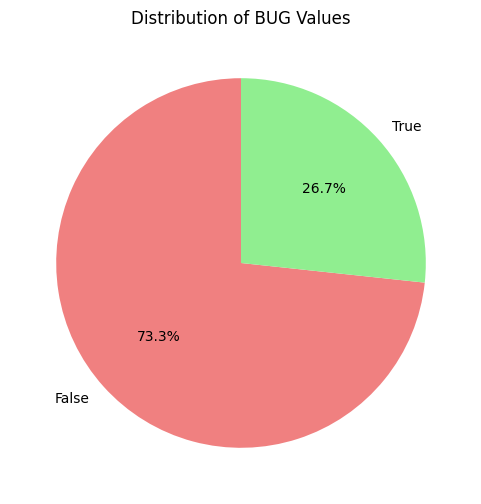

In [30]:
#This will be a pie chart which depicts the percentage of TRUE and FALSE on the BUG feature. This will show the percentage of buggy vs. non-buggy files. 
#26.7% of the files are buggy and 73.3% are non-buggy

bug_counts = data['BUG'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(bug_counts, labels=bug_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen'])
plt.title('Distribution of BUG Values')
plt.show()

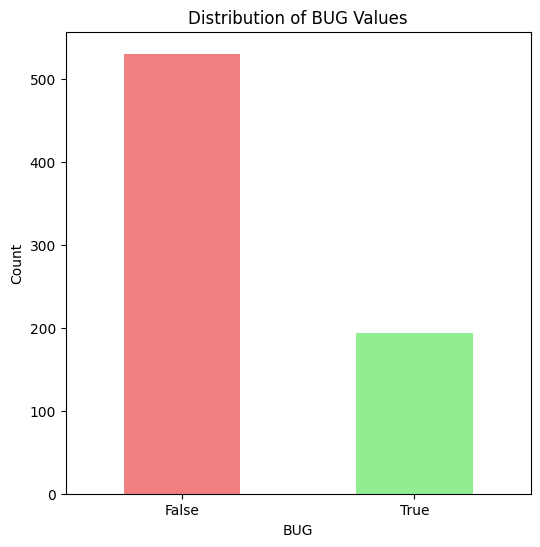

In [31]:
#This will represent the same thing using a bar Graph
bug_counts = data['BUG'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(6, 6))
bug_counts.plot(kind='bar', color=['lightcoral', 'lightgreen'])
plt.title('Distribution of BUG Values')
plt.xlabel('BUG')
plt.ylabel('Count')
plt.xticks(rotation=0)  # If you want to rotate x-axis labels for better visibility
plt.show()

In [32]:
#3 I would say my selected features gave the most accuracy (at 89%) and the precision was at 75%.
#3a - The features I selected were 'WMC','CBO', 'LCOM', 'MaX_CC' ,'REF', 'CountOfDeveloper', 'Age', 'AVG_SET', and 'BUG'
#3b - I picked these features out of a handful of Static Only and out of handful of Change Only. They weren't (for most of the features) redundant entries, like if you see the 'IC' or 'CBM'
#features, they mainly contain 0's. I thought the data differed enough to provide more accuracy. 

In [33]:
#4 Add another Algorithm of your choice and repeat step 3 and provide answer to the same question in Step 3

In [34]:
from sklearn.metrics import confusion_matrix

#4 Random Forest Classifier
#- All FEATURES RESULTS
from sklearn.metrics import confusion_matrix
X = data.drop(['BUG'], axis=1) 
y = data['BUG']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
# Calculate metrics
true_positives = conf_matrix[1, 1]
true_negatives = conf_matrix[0, 0]
false_positives = conf_matrix[0, 1]
false_negatives = conf_matrix[1, 0]

accuracy = (true_positives + true_negatives) / np.sum(conf_matrix)
precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
fpr = false_positives / (false_positives + true_negatives)

mcc_numerator = (true_positives * true_negatives) - (false_positives * false_negatives)
mcc_denominator = np.sqrt((true_positives + false_positives) * (true_positives + false_negatives) * (true_negatives + false_positives) * (true_negatives + false_negatives))
mcc = mcc_numerator / mcc_denominator

# Print the results
print(f"Accuracy (Random Forest Classifier - All Features): {accuracy * 100: 2f}%")
print(f"Precision (Random Forest Classifier - All Features): {precision * 100: 2f}%")
print(f"Recall (Random Forest Classifier - All Features): {recall * 100: 2f}%")
print(f"FPR (Random Forest Classifier - All Features): {fpr * 100: 2f}%")
print(f"MCC (Random Forest Classifier - All Features): {mcc * 100: 2f}%")

#Random Forest Classifier - STATIC ONLY RESULTS
X_static = data_static.drop(['BUG'], axis=1) 
y_static = data_static['BUG']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_static, y_static, test_size=0.2, random_state=42)

classifier1 = RandomForestClassifier(n_estimators=100, random_state=42)
classifier1.fit(X_train1, y_train1)
y_pred1 = classifier1.predict(X_test1)
conf_matrix1 = confusion_matrix(y_test1, y_pred1)
# Calculate metrics
true_positives1 = conf_matrix1[1, 1]
true_negatives1 = conf_matrix1[0, 0]
false_positives1 = conf_matrix1[0, 1]
false_negatives1 = conf_matrix1[1, 0]

accuracy1 = (true_positives1 + true_negatives1) / np.sum(conf_matrix1)
precision1 = true_positives1 / (true_positives1 + false_positives1)
recall1 = true_positives1 / (true_positives1 + false_negatives1)
fpr1 = false_positives1 / (false_positives1 + true_negatives1)

mcc_numerator1 = (true_positives1 * true_negatives1) - (false_positives1 * false_negatives1)
mcc_denominator1 = np.sqrt((true_positives1 + false_positives1) * (true_positives1 + false_negatives1) * (true_negatives1 + false_positives1) * (true_negatives1 + false_negatives1))
mcc1 = mcc_numerator1 / mcc_denominator1

# Print the results
print(f" ")
print(f"Accuracy (Random Forest Classifier - Static Only): {accuracy * 100: 2f}%")
print(f"Precision (Random Forest Classifier - Static Only): {precision * 100: 2f}%")
print(f"Recall (Random Forest Classifier - Static Only): {recall * 100: 2f}%")
print(f"FPR (Random Forest Classifier - Static Only): {fpr * 100: 2f}%")
print(f"MCC (Random Forest Classifier - Static Only): {mcc * 100: 2f}%")

#Random Forest Classifier - CHANGE ONLY RESULTS

X_change = data_change.drop(['BUG'], axis=1) 
y_change = data_change['BUG']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_change, y_change, test_size=0.2, random_state=42)

classifier2 = RandomForestClassifier(n_estimators=100, random_state=42)
classifier2.fit(X_train2, y_train2)
y_pred2 = classifier2.predict(X_test2)
conf_matrix2 = confusion_matrix(y_test2, y_pred2)
# Calculate metrics
true_positives2 = conf_matrix2[1, 1]
true_negatives2 = conf_matrix2[0, 0]
false_positives2 = conf_matrix2[0, 1]
false_negatives2 = conf_matrix2[1, 0]

accuracy2 = (true_positives2 + true_negatives2) / np.sum(conf_matrix2)
precision2 = true_positives2 / (true_positives2 + false_positives2)
recall2 = true_positives2 / (true_positives2 + false_negatives2)
fpr2 = false_positives2 / (false_positives2 + true_negatives2)

mcc_numerator2 = (true_positives2 * true_negatives2) - (false_positives2 * false_negatives2)
mcc_denominator2 = np.sqrt((true_positives2 + false_positives2) * (true_positives2 + false_negatives2) * (true_negatives2 + false_positives2) * (true_negatives2 + false_negatives2))
mcc2 = mcc_numerator2 / mcc_denominator2

# Print the results
print(f" ")
print(f"Accuracy (Random Forest Classifier - Change Only): {accuracy2 * 100: 2f}%")
print(f"Precision (Random Forest Classifier - Change Only): {precision2 * 100: 2f}%")
print(f"Recall (Random Forest Classifier - Change Only): {recall2 * 100: 2f}%")
print(f"FPR (Random Forest Classifier - Change Only): {fpr2 * 100: 2f}%")
print(f"MCC (Random Forest Classifier - Change Only): {mcc2 * 100: 2f}%")

#Random Forest Classifier - MY FEATURES ONLY RESULTS

X_my = my_data.drop(['BUG'], axis=1) 
y_my = my_data['BUG']

X_train3, X_test3, y_train3, y_test3 = train_test_split(X_my, y_my, test_size=0.2, random_state=42)

classifier3 = RandomForestClassifier(n_estimators=100, random_state=42)
classifier3.fit(X_train3, y_train3)
y_pred3 = classifier3.predict(X_test3)
conf_matrix3 = confusion_matrix(y_test3, y_pred3)
# Calculate metrics
true_positives3 = conf_matrix3[1, 1]
true_negatives3 = conf_matrix3[0, 0]
false_positives3 = conf_matrix3[0, 1]
false_negatives3 = conf_matrix3[1, 0]

accuracy3 = (true_positives3 + true_negatives3) / np.sum(conf_matrix3)
precision3 = true_positives3 / (true_positives3 + false_positives3)
recall3 = true_positives3 / (true_positives3 + false_negatives3)
fpr3 = false_positives3 / (false_positives3 + true_negatives3)

mcc_numerator3 = (true_positives3 * true_negatives3) - (false_positives3 * false_negatives3)
mcc_denominator3 = np.sqrt((true_positives3 + false_positives3) * (true_positives3 + false_negatives3) * (true_negatives3 + false_positives3) * (true_negatives3 + false_negatives3))
mcc3 = mcc_numerator3 / mcc_denominator3

# Print the results
print(f" ")
print(f"Accuracy (Random Forest Classifier - My Features Only): {accuracy2 * 100: 2f}%")
print(f"Precision (Random Forest Classifier - My Features Only): {precision2 * 100: 2f}%")
print(f"Recall (Random Forest Classifier - My Features Only): {recall2 * 100: 2f}%")
print(f"FPR (Random Forest Classifier - My Features Only): {fpr2 * 100: 2f}%")
print(f"MCC (Random Forest Classifier - My Features Only): {mcc2 * 100: 2f}%")

Accuracy (Random Forest Classifier - All Features):  93.793103%
Precision (Random Forest Classifier - All Features):  84.210526%
Recall (Random Forest Classifier - All Features):  91.428571%
FPR (Random Forest Classifier - All Features):  5.454545%
MCC (Random Forest Classifier - All Features):  83.659245%
 
Accuracy (Random Forest Classifier - Static Only):  93.793103%
Precision (Random Forest Classifier - Static Only):  84.210526%
Recall (Random Forest Classifier - Static Only):  91.428571%
FPR (Random Forest Classifier - Static Only):  5.454545%
MCC (Random Forest Classifier - Static Only):  83.659245%
 
Accuracy (Random Forest Classifier - Change Only):  94.482759%
Precision (Random Forest Classifier - Change Only):  84.615385%
Recall (Random Forest Classifier - Change Only):  94.285714%
FPR (Random Forest Classifier - Change Only):  5.454545%
MCC (Random Forest Classifier - Change Only):  85.725594%
 
Accuracy (Random Forest Classifier - My Features Only):  94.482759%
Precision (R

In [35]:
#4 cont. I kept the same features I selected earlier, for the same reason. It seemed beneficial to have a mix of Static and Change Features included given the results. 

In [36]:
#5 - I think the Random Forest Classifier provided the most accurate results, with good enough precision and recall.
#5a - The model's main set-back are data outliers. Outliers tend to become mislabeled instances and can drastically affect the models decision-making. 
#5b - My decision primarily rested on the Accuracy and Precision. The False Positive Rate for all of them seemed pretty insignificant, as they had less than 6% for most. 
#Recall takes into affect True Positives and False Negatives and the models ability to avoid the false negatives. While this is important, most of the results I received for 
#Recall were pretty accurate. 

In [37]:
#6 - It's a mixed bag. For this instance, having a mix of both Static and Change, or All features, ended up giving the best performance. 
#If you look at the Logistic Regression Numbers, All Features Accuracy = 88.8%, Selected Features Accuracy = 89.65%. These are higher than Only Change or Only Static. 
#I would say it's entirely dependent on the data and magnitude of data outliers. 